In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import scanpy_helpers as sh
import matplotlib.pyplot as plt
import itertools

sc.settings.set_figure_params(vector_friendly=True, dpi=150)

In [3]:
adata = sc.read_h5ad("../../data/30_merge_adata/adata_scvi_annotated.h5ad")

In [4]:
artifact_dir = "../../data/70_downstream_analyses/overview_plots"

In [5]:
!mkdir -p {artifact_dir}

In [6]:
sh.colors.set_scale_anndata(adata, "patient")
sh.colors.set_scale_anndata(adata, "timepoint")
sh.colors.set_scale_anndata(adata, "cell_type")
sh.colors.set_scale_anndata(adata, "response")

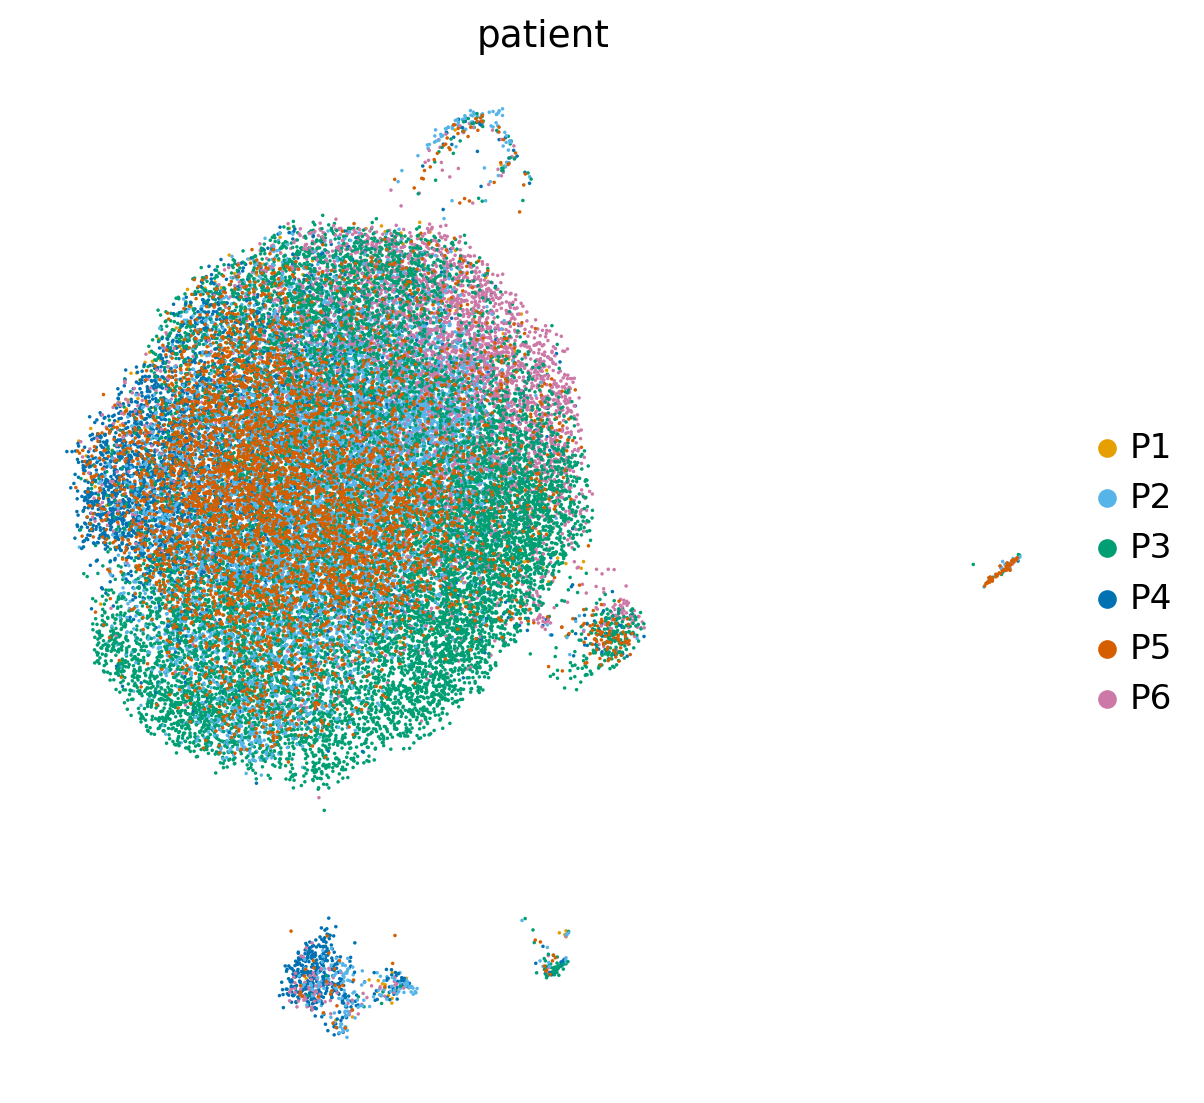

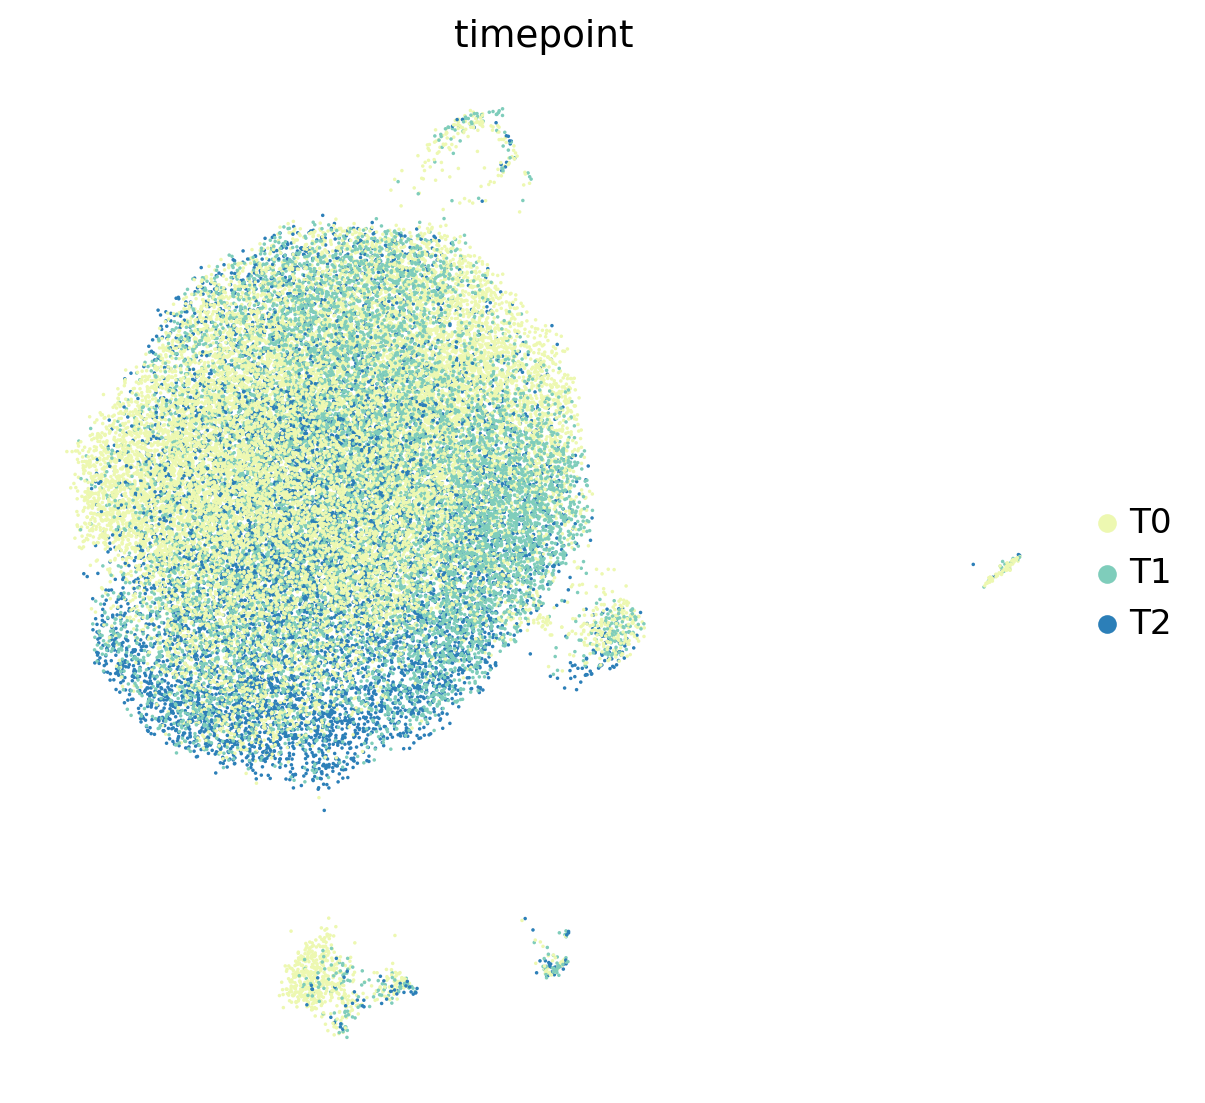

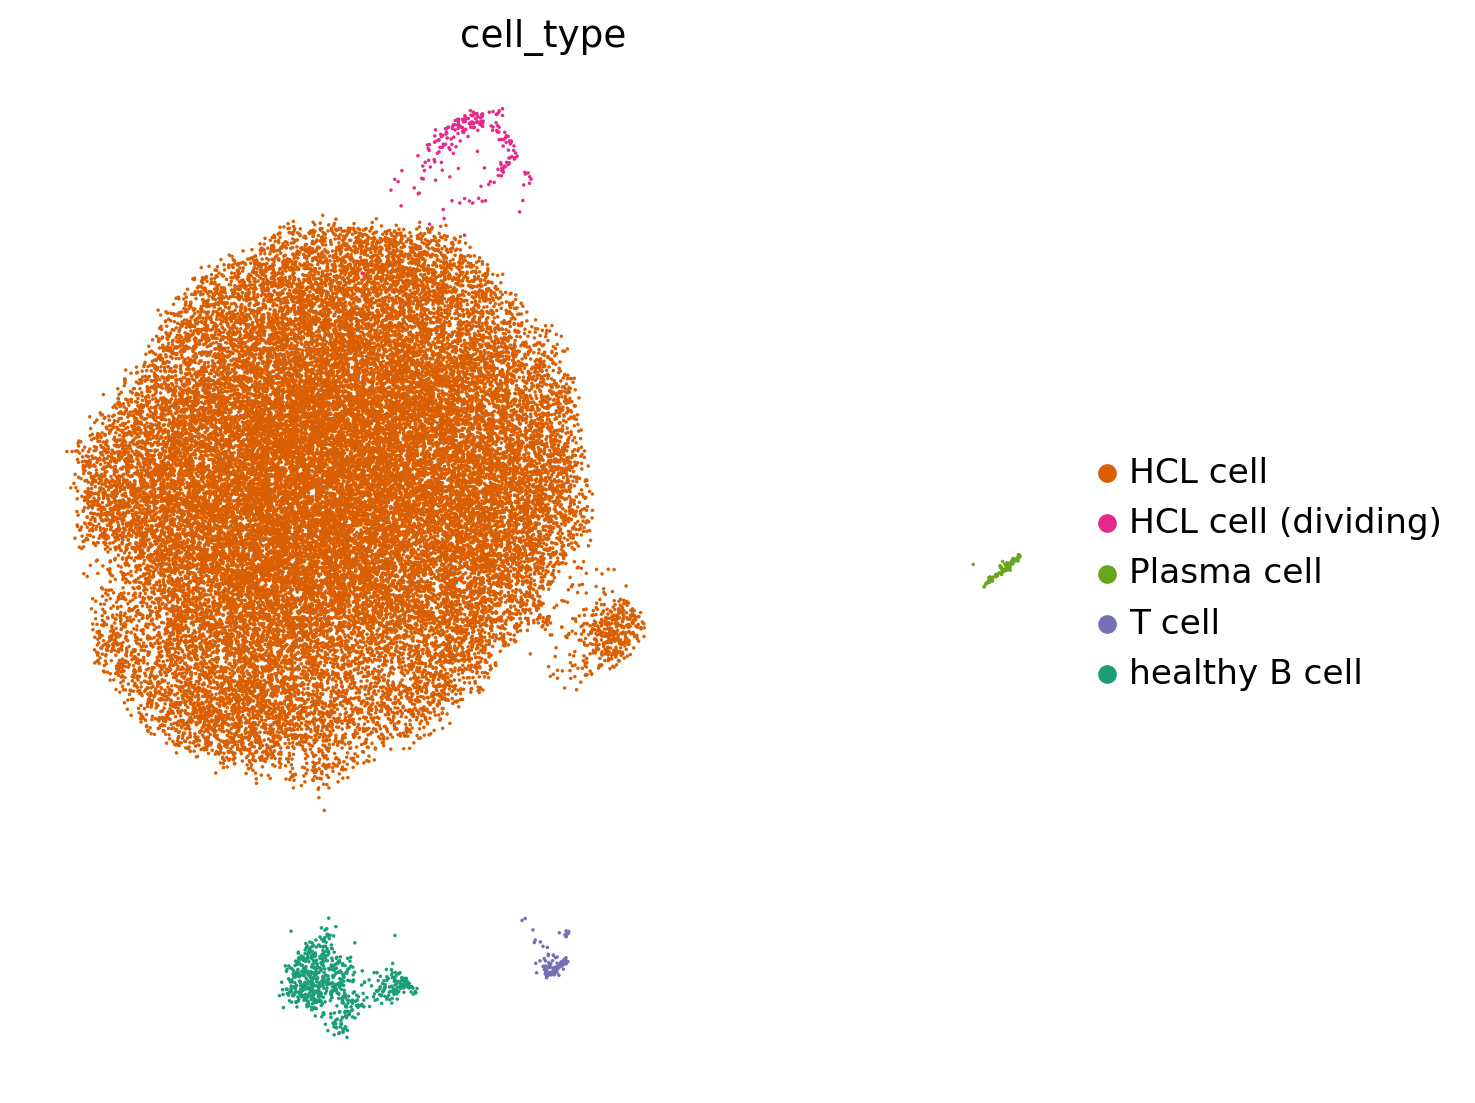

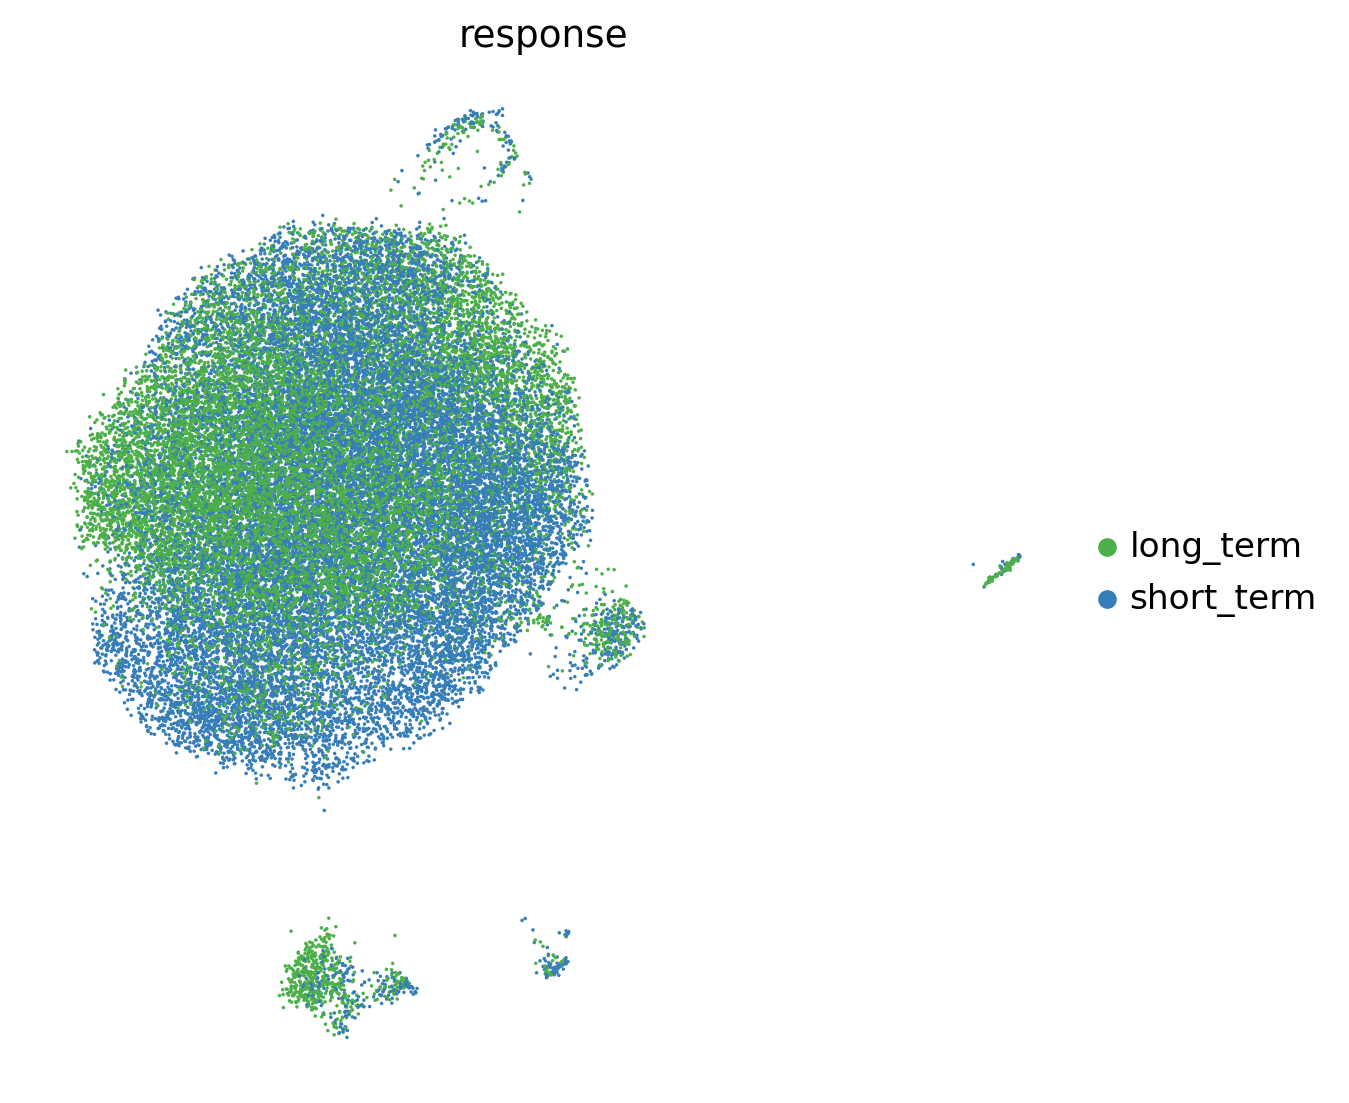

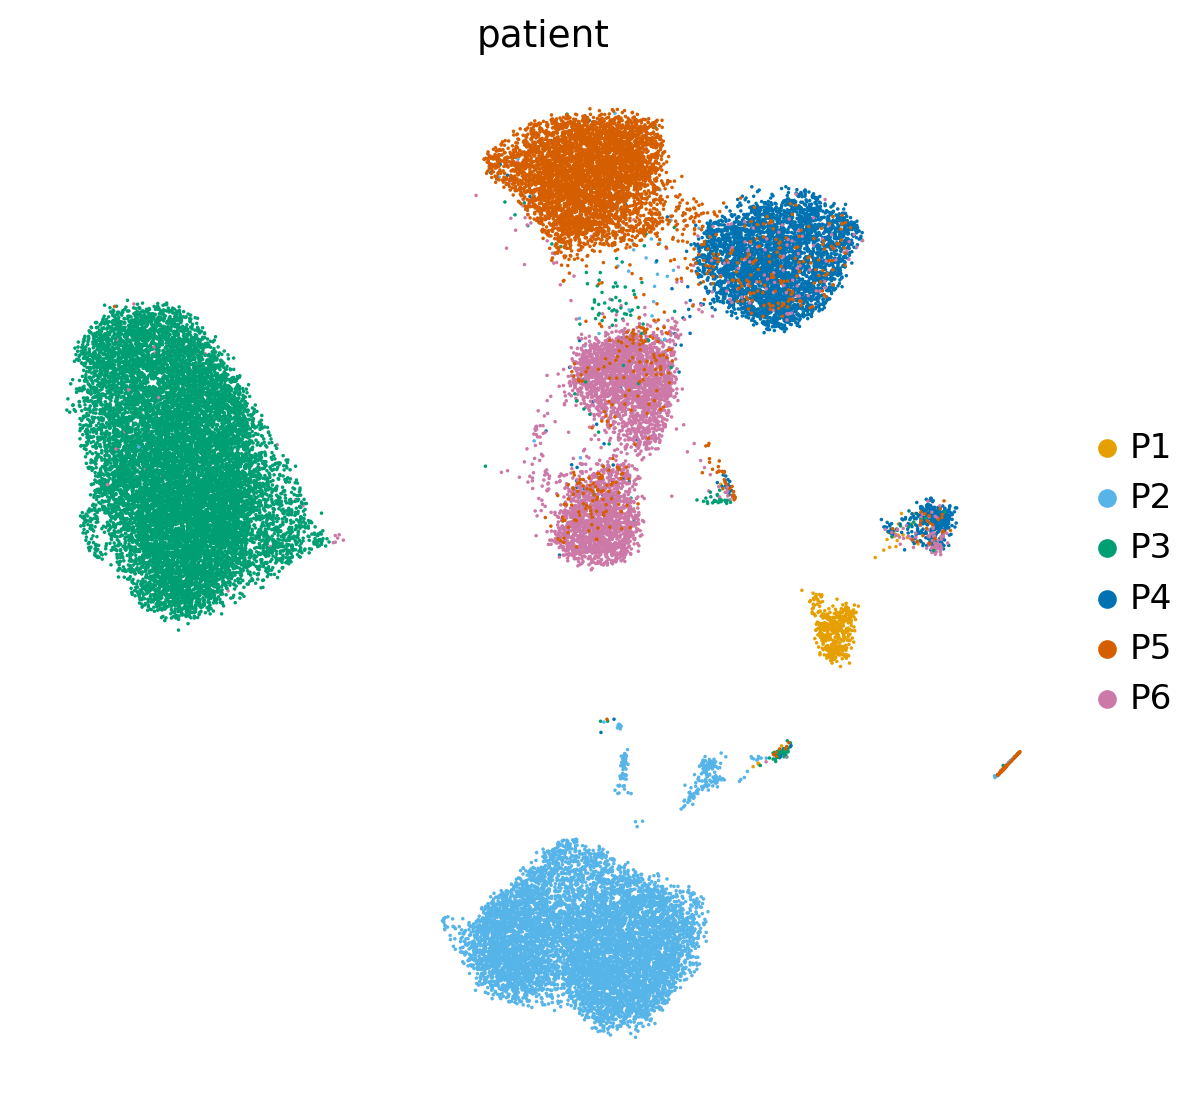

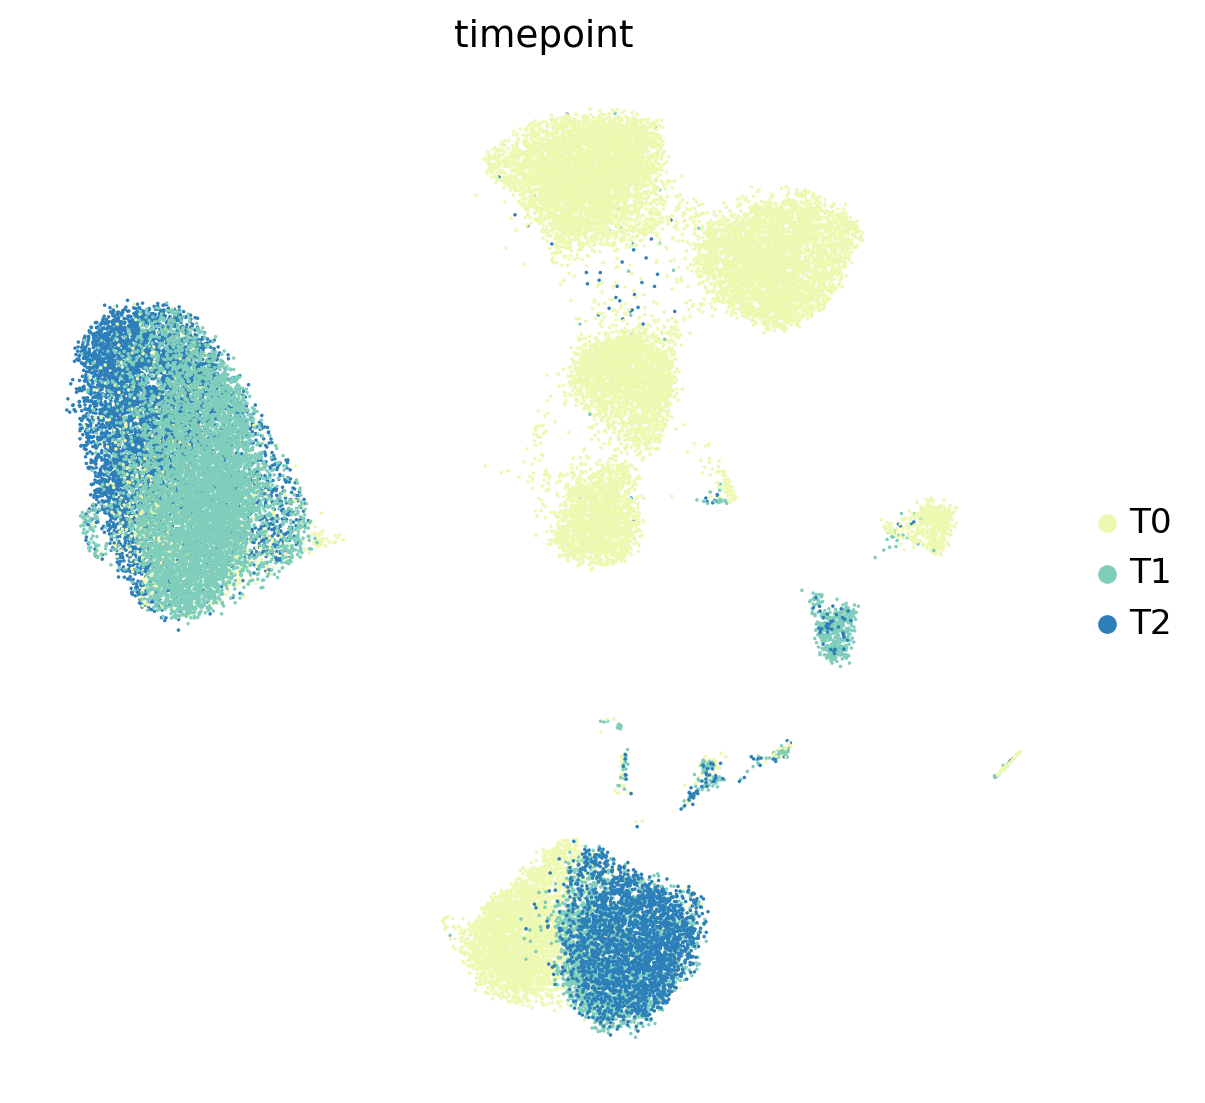

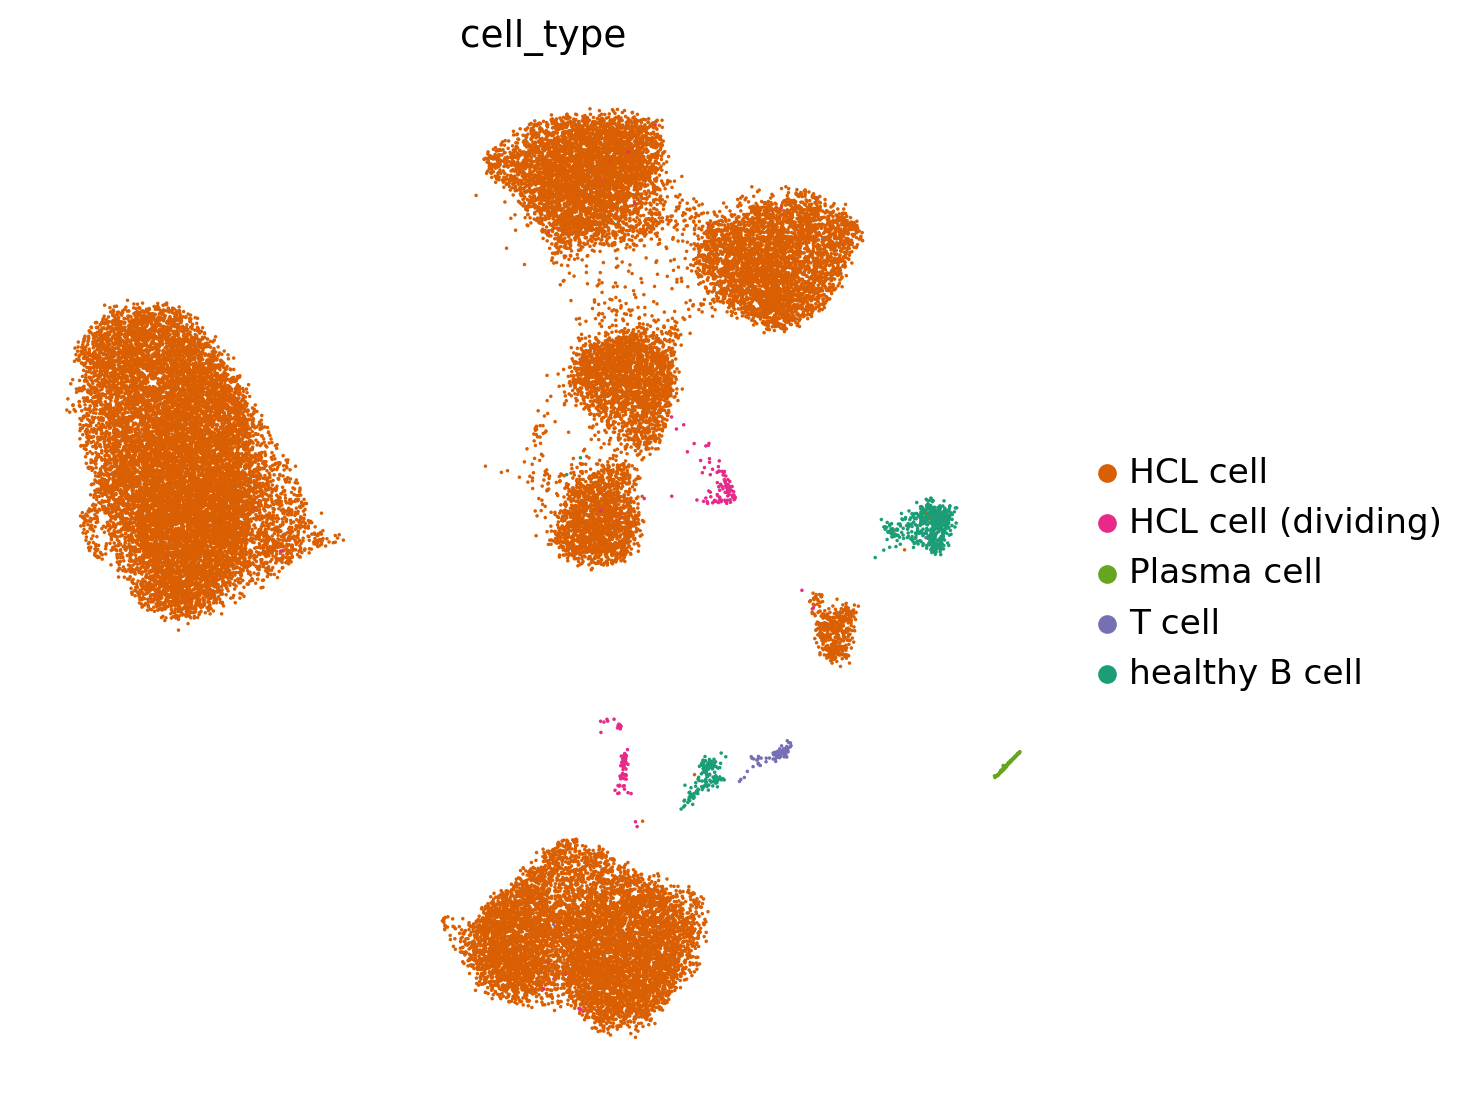

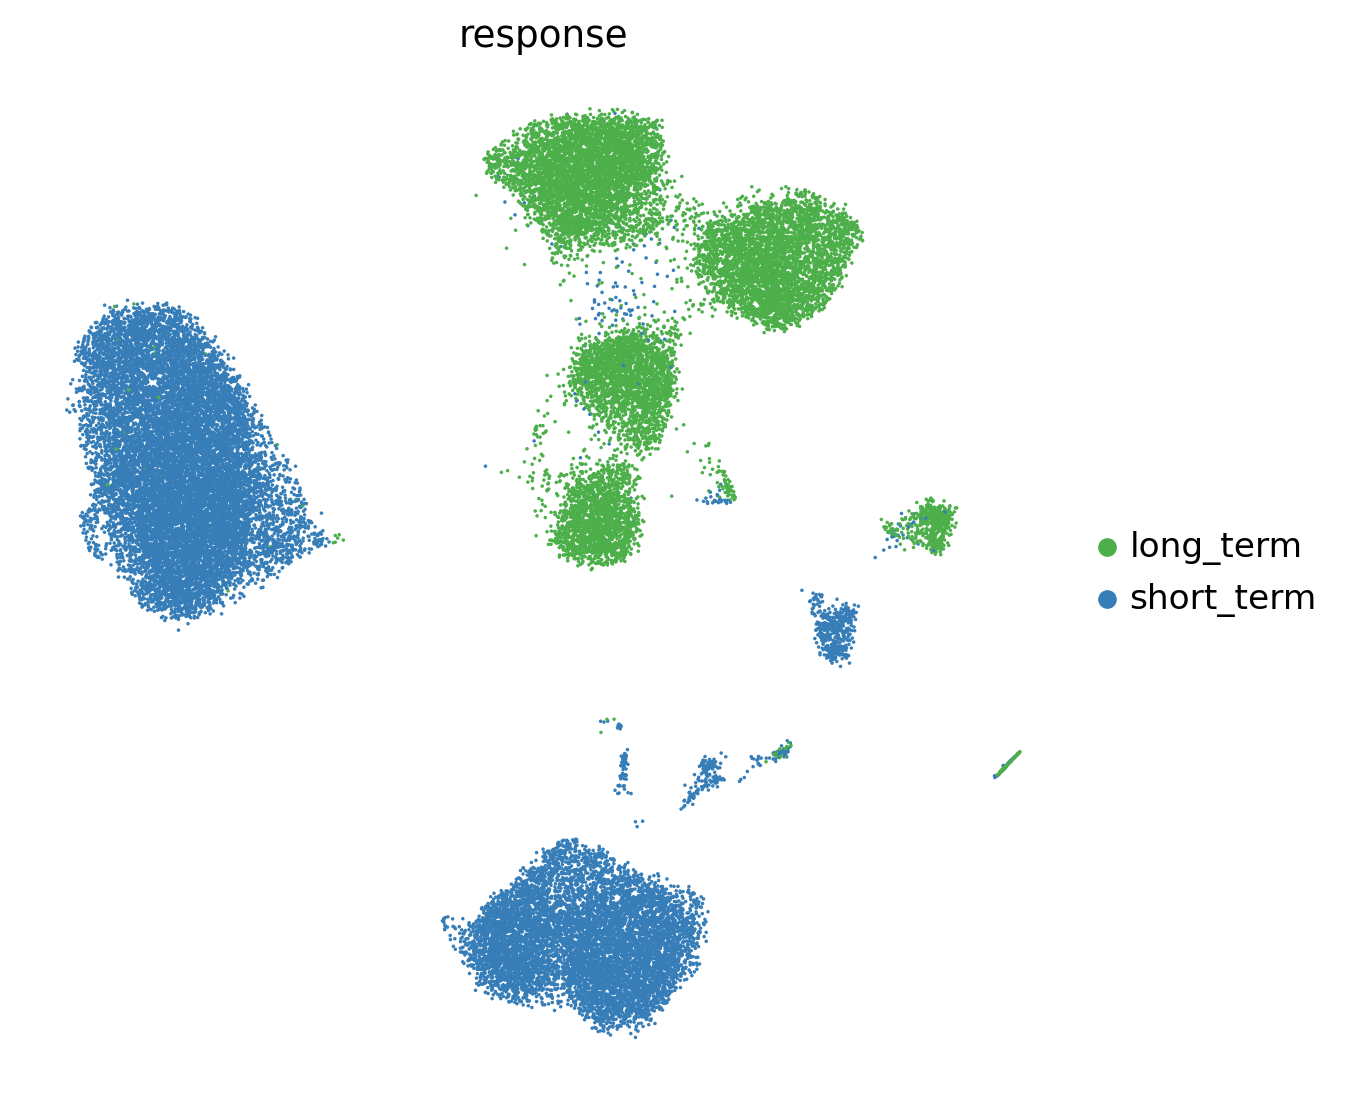

In [7]:
with plt.rc_context({"figure.figsize": (7, 7), "figure.dpi": 96}):
    for basis in ["umap", "umap_uncorrected"]:
        for color in ["patient", "timepoint", "cell_type", "response"]:
            fig = sc.pl.embedding(
                adata,
                color=color,
                frameon=False,
                basis=basis,
                size=7,
                return_fig=True,
                show=False,
            )
            fig.savefig(
                f"{artifact_dir}/overview_{basis}_{color}.pdf",
                bbox_inches="tight",
                dpi=1200,
            )
            fig.show()

## Marker genes

In [8]:
marker_genes = {
    "T cell": ["CD3E"],
    "dividing cells": ["CDK1"],
    "B lineage": ["CD79A"],
    "B cell healthy": ["FAM129C"],
    "B cell malignant": ["FLT3"],
    "Plasma cell": ["MZB1", "SDC1"],
}

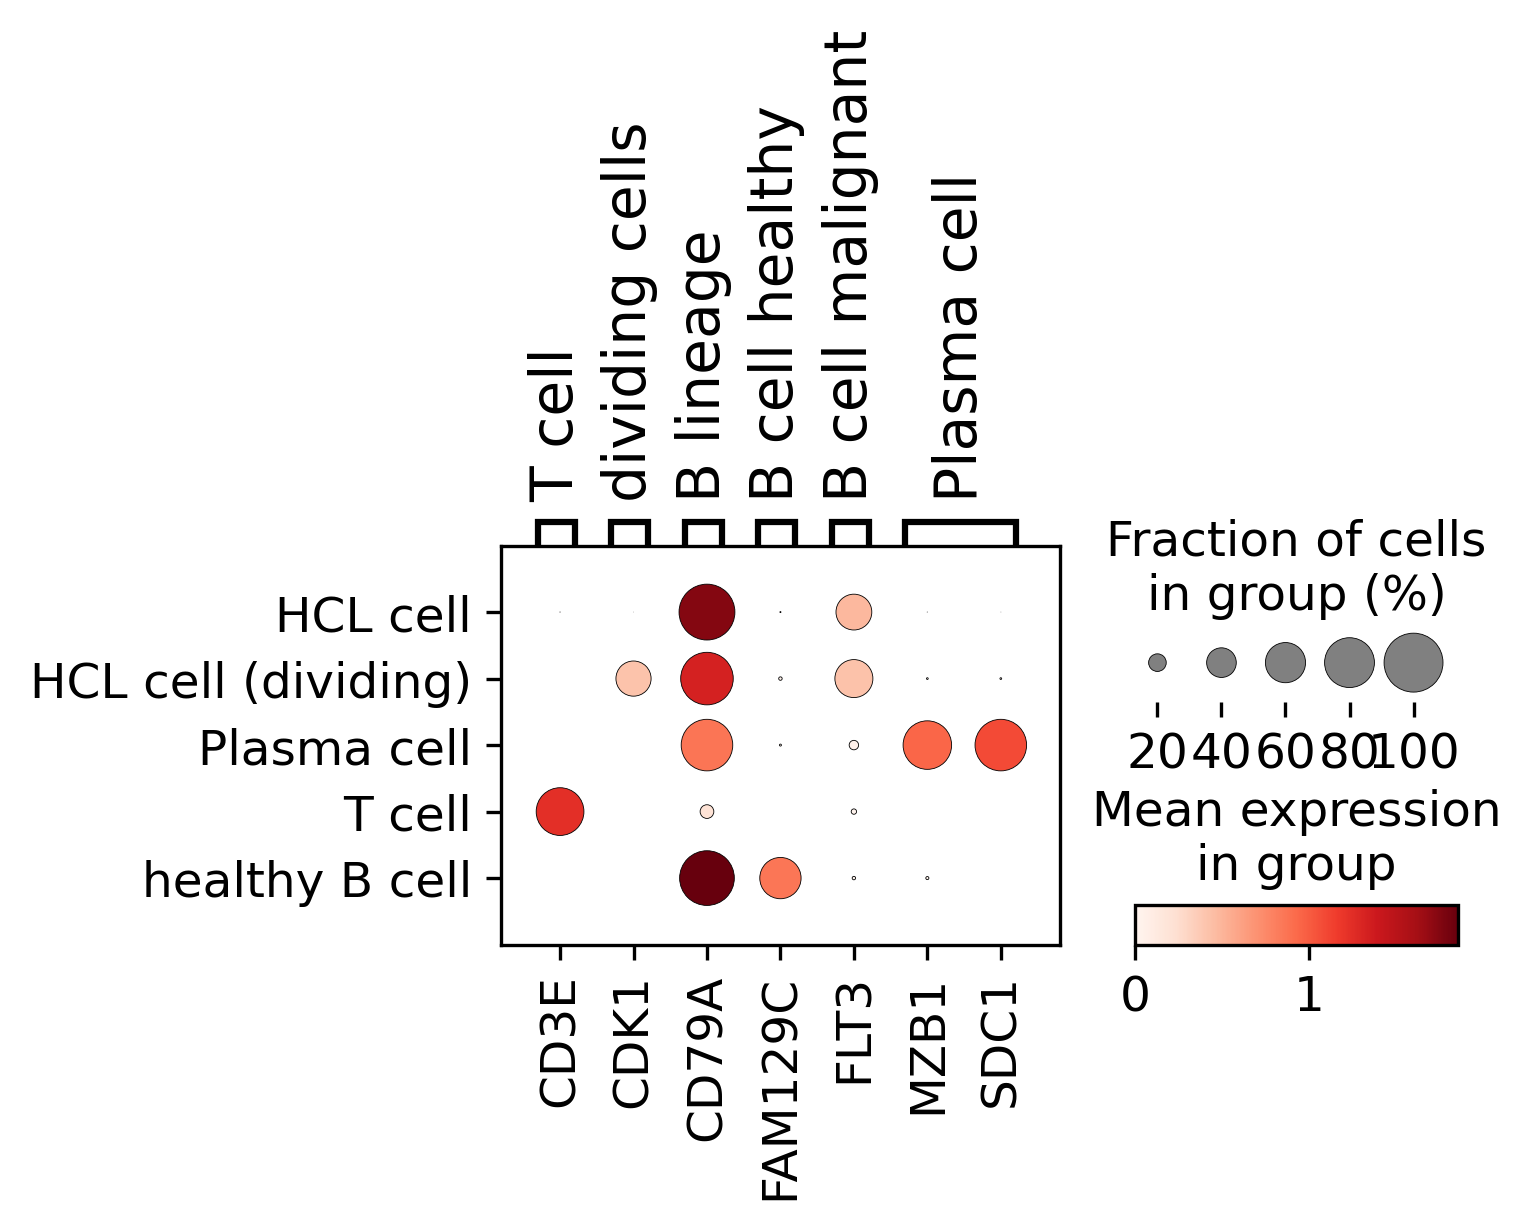

In [9]:
fig = sc.pl.dotplot(adata, var_names=marker_genes, groupby="cell_type", return_fig=True)
fig.savefig(
    f"{artifact_dir}/cell_type_markers_dotplot.pdf", bbox_inches="tight", dpi=1200
)

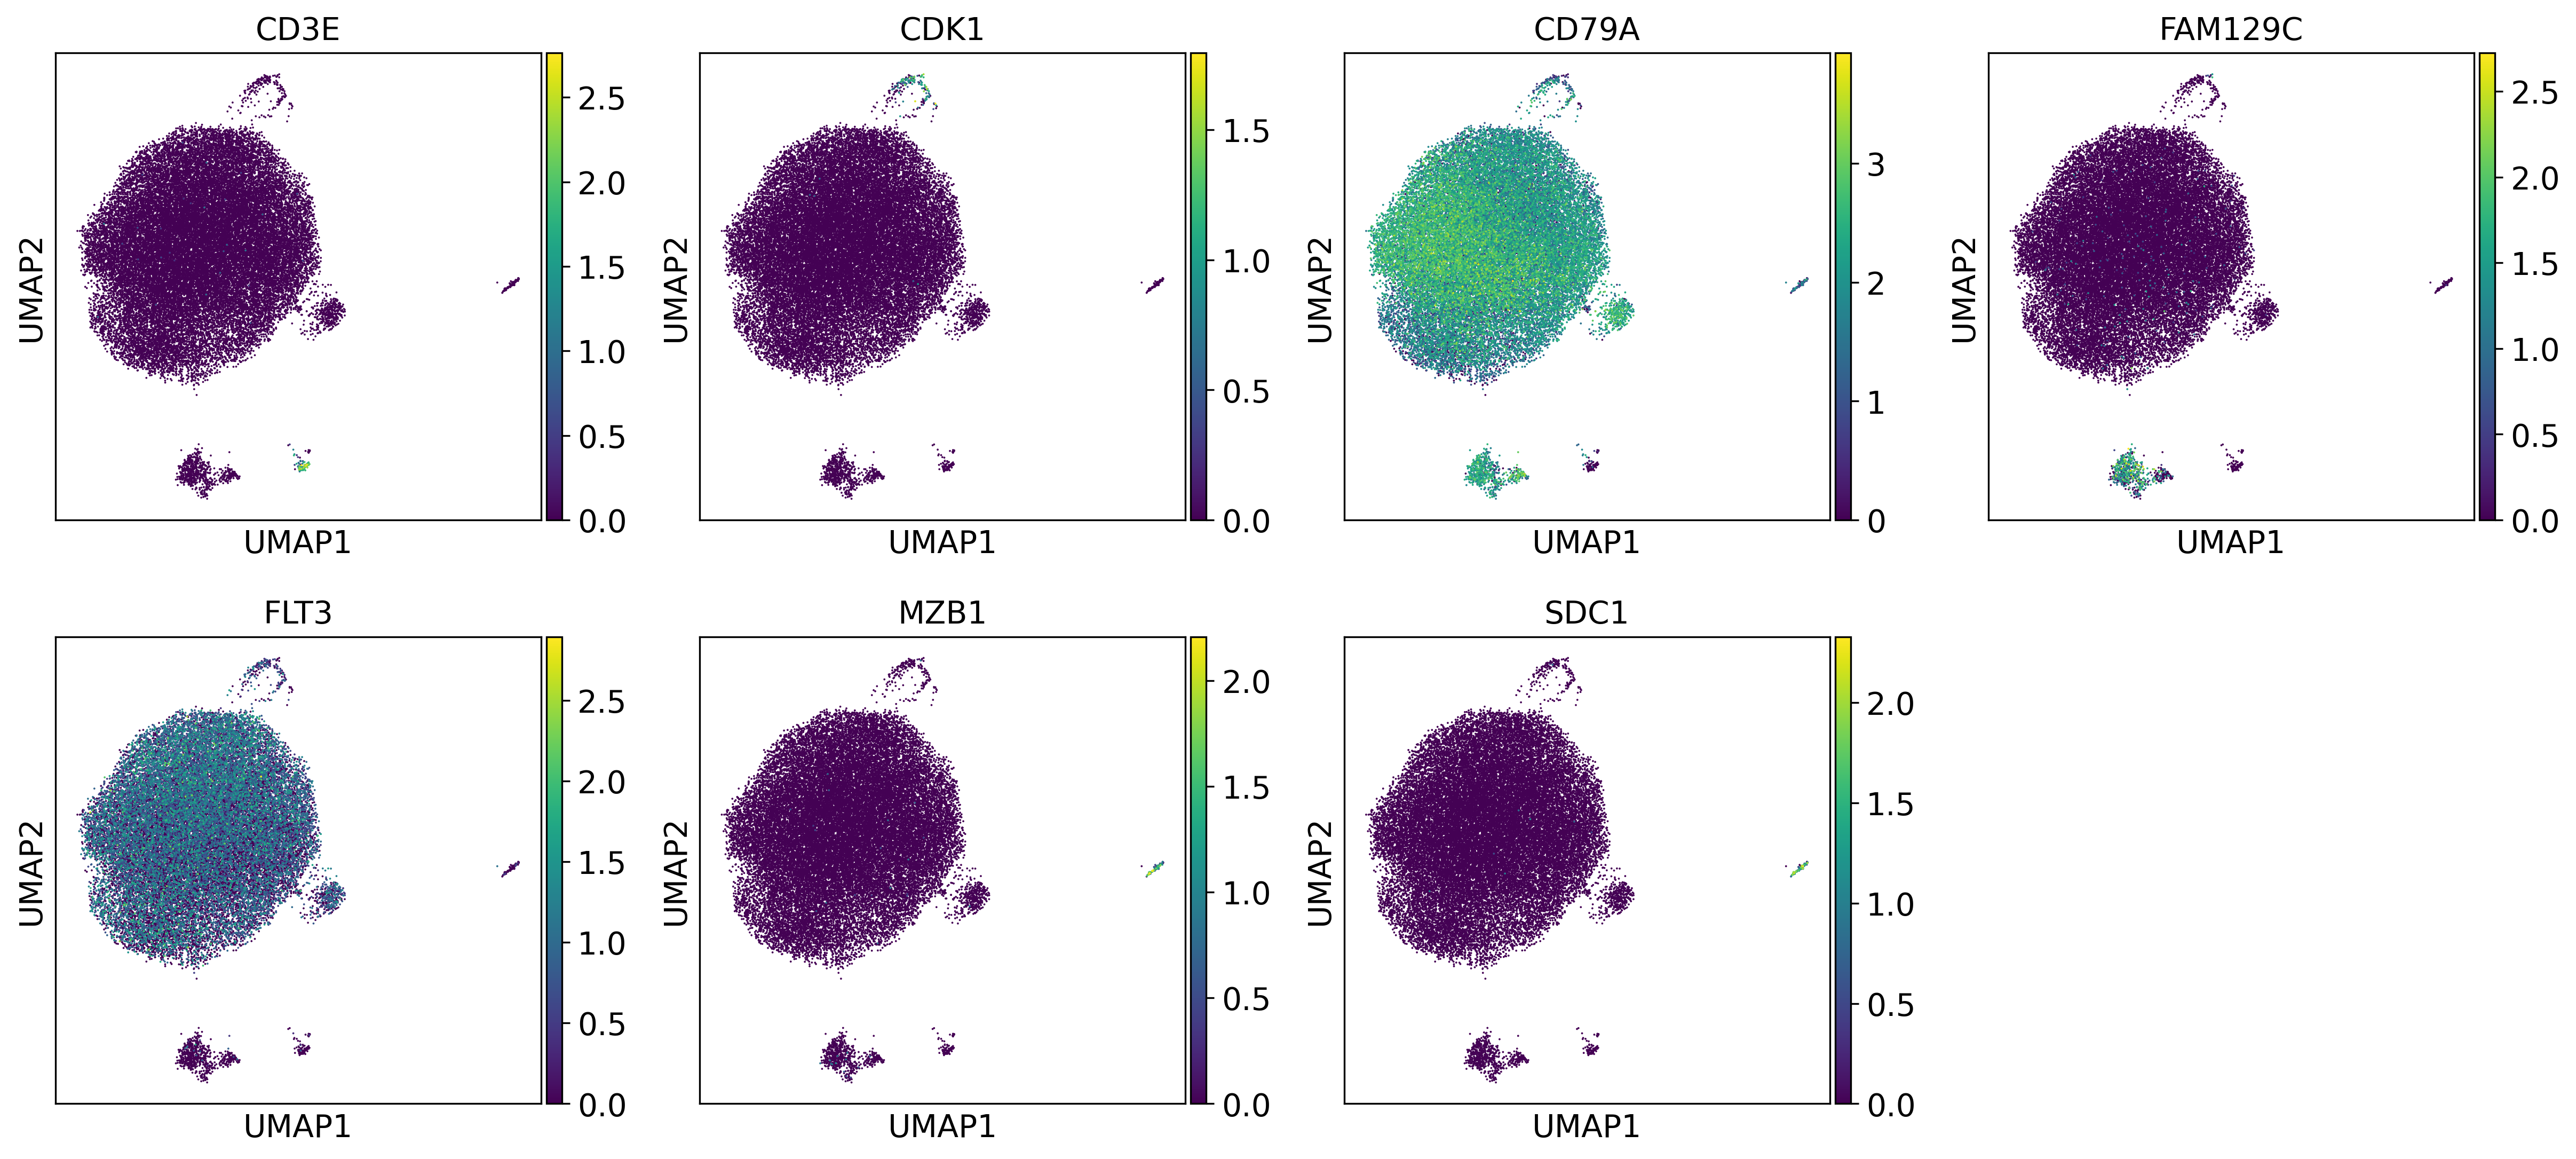

In [10]:
fig = sc.pl.umap(
    adata,
    color=list(itertools.chain.from_iterable(marker_genes.values())),
    return_fig=True,
)
fig.savefig(f"{artifact_dir}/cell_type_markers_umap.pdf", dpi=1200, bbox_inches="tight")

## Marker genes 2

In [11]:
v600e_signature = [
    x.strip()
    for x in """
 - IL2RA
- CCND1
- ETV5
- DUSP6
- EGR1
- SPRY2
- ITGAX
- ACP5
- GAS7
- FLT3
- FGFR1
""".replace(
        "-", ""
    ).split()
]

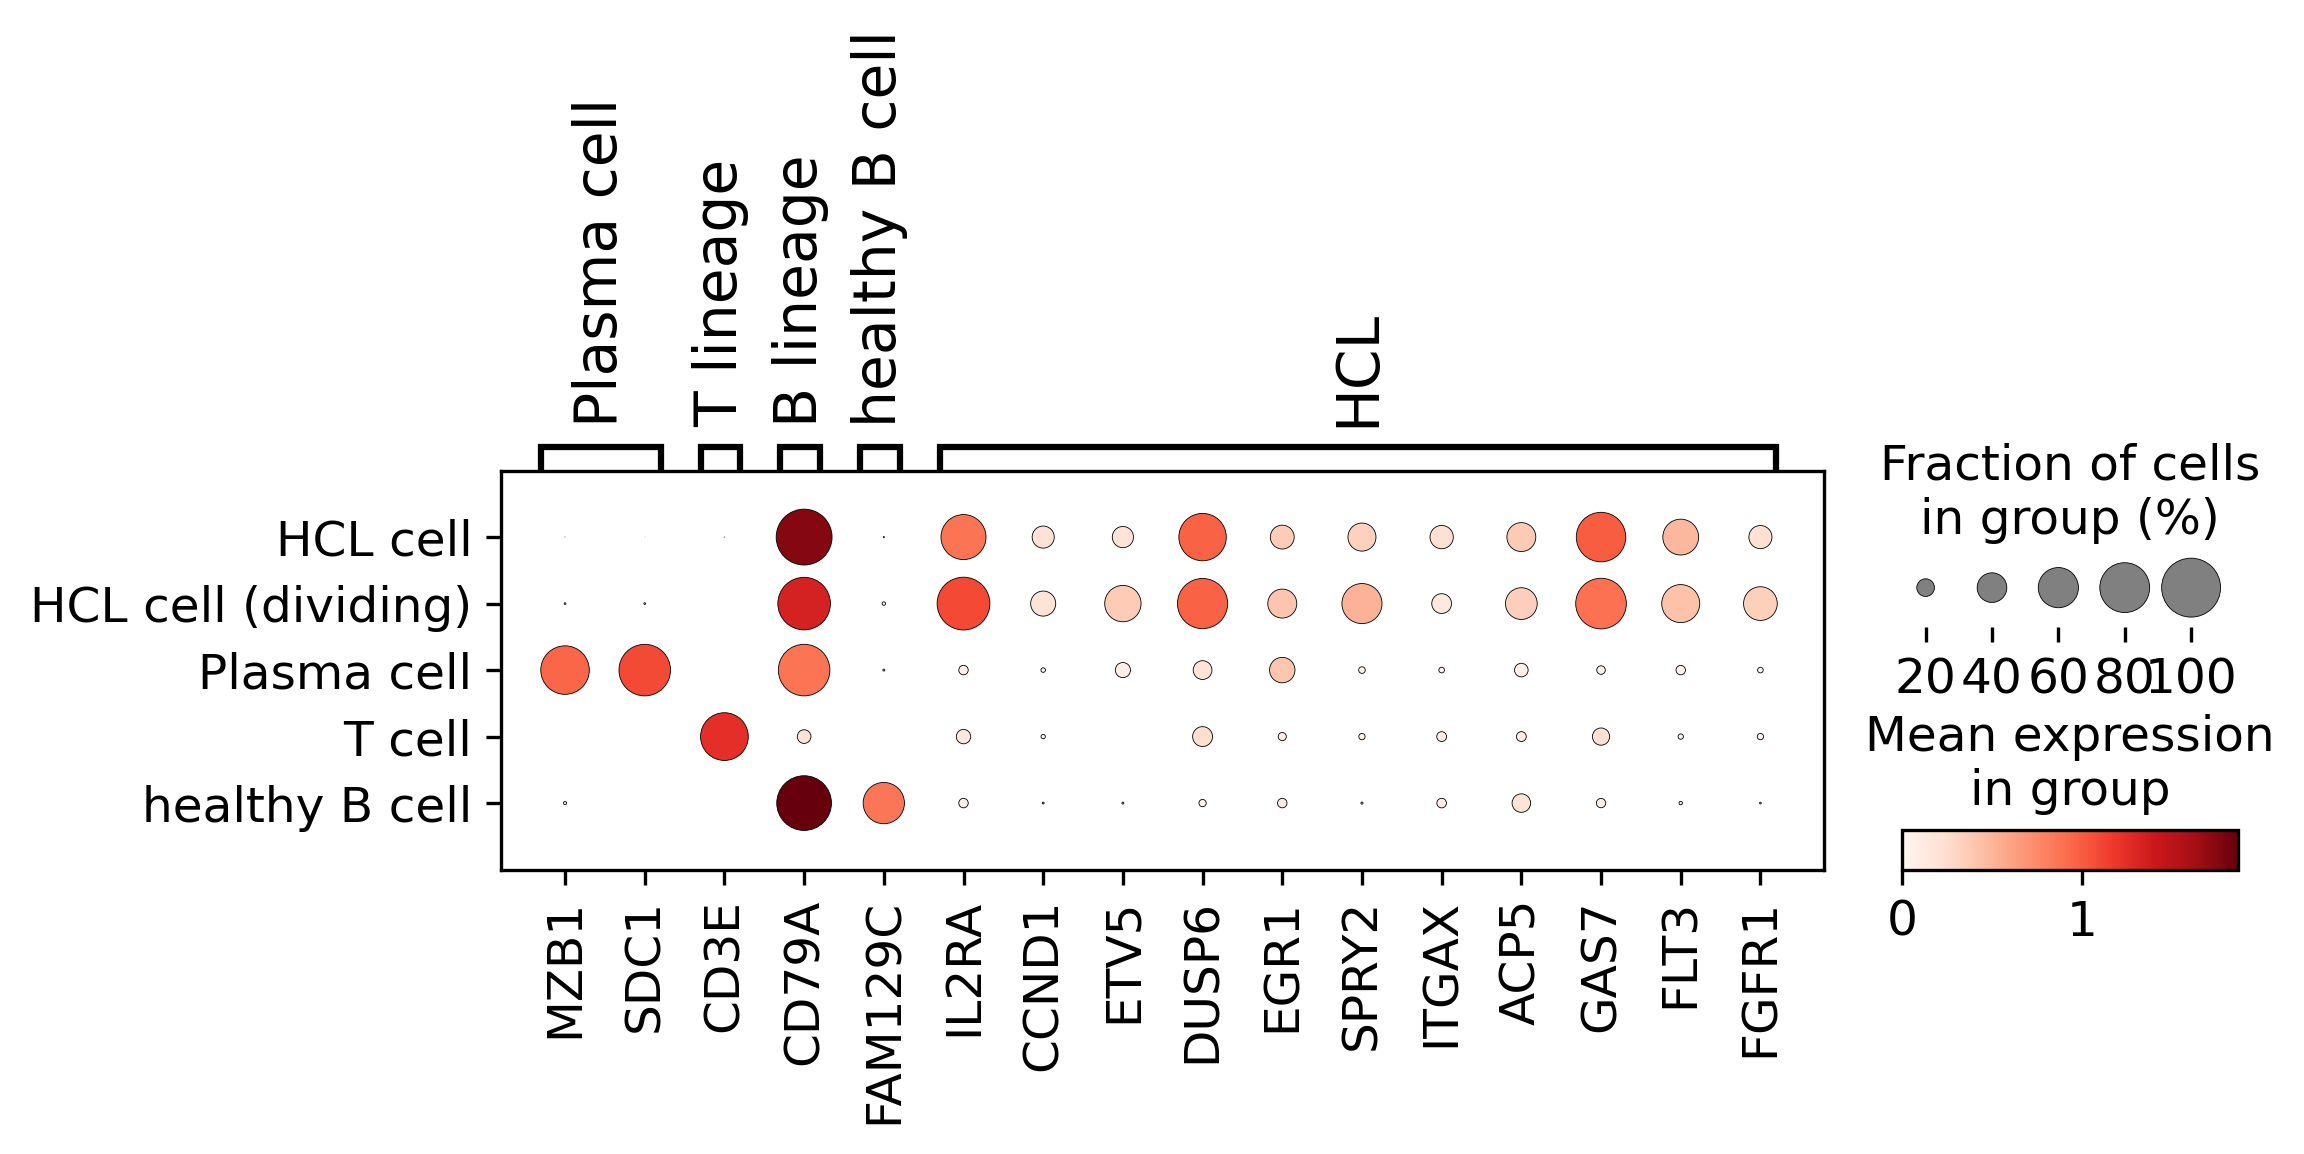

In [12]:
fig = sc.pl.dotplot(adata, var_names={
    "Plasma cell": ["MZB1", "SDC1"],
    "T lineage": ["CD3E"], 
    "B lineage": ["CD79A"],
    "healthy B cell": ["FAM129C"],
    "HCL": v600e_signature
},  groupby="cell_type", return_fig=True)
fig.savefig(f"{artifact_dir}/braf_v600e_markers_dotplot.pdf", dpi=600, bbox_inches="tight")

## cell stats

In [13]:
sh.util.cell_type_fractions(
    adata, ["patient", "timepoint", "cell_type"], ["patient", "timepoint"]
).to_csv(f"{artifact_dir}/cell_type_fractions_patient_timepoint.csv")

In [14]:
sh.util.cell_type_fractions(adata, ["patient", "cell_type"], ["patient"]).to_csv(
    f"{artifact_dir}/cell_type_fractions_patient.csv"
)

In [15]:
sh.util.cell_type_fractions(
    adata, ["patient", "response", "timepoint"], ["patient", "response"]
).to_csv(f"{artifact_dir}/timepoint_fractions_patient.csv")